In [29]:
# %run code.ipynb # use this line when using online jupyter-notebook
%run ./code.ipynb # or supply the code with the path in case of using installed jupyter-notebook

Let's conduct an experiment that every experimentator wish of. We will do it dry, quick and we will know the real values of measurements. This might show us the difficulties and danger moments in result interpretation.
Imagine that we have to test a drug. For this we should carry out several experiments both for drug and control. This time we'll have 3 days of experiments and 10 measurements per day. With our code we can see the real values of measurements for control and drug (here it's called exp and conduct an experiment. For the sake of generality in our code the days are called clusters and 'drug' is exp(experiment).

##  1. Simply generate data and display it

We can set true values of 'drug' and 'control' different and see how experimental data look like. Does it look similar to data that you get in your laboratory?

Mean experimetal =  0.874
Mean control =  0.978

inter cluster SD = 0.124
intra cluster SD = 0.196
ICC =  0.285


p value adjusted =  0.484
There is no reason to reject the null hypothesis of equality of means with a significance level of 0.05


Let's analyze the result
In order to simulate more experiments based on parameters from your data,
we have  to assume that the measured parameters are true (as they appear to be in nature).
So, for now we have simulated N = 1000 experiments and the probability of false negative error is 0.878


What if the means that you obtained are not true? This can hypothetically be the false positive result
Let's assume that your SD are true and the means of control and experiment are not. 
The means will be equal to (mean_exp+ mean_control)/2 = 0.926
So, the probability of false positive error is 0.032


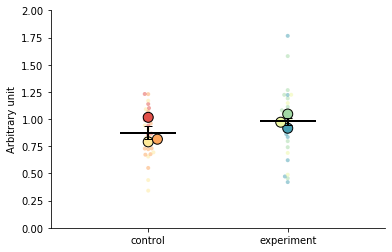

In [33]:
data_exp = generate_data(true_value=0.8, inter_cluster_SD=0.03, intra_cluster_SD=0.3, \
                             N_clusters=3, N_per_cluster=10)
data_control = generate_data(true_value=1, inter_cluster_SD=0.03, intra_cluster_SD=0.3, \
                             N_clusters=3, N_per_cluster=10)
analyze(data_exp, data_control)


Now change the variation of measurements per day: 

Mean experimetal =  0.674
Mean control =  0.983

inter cluster SD = 0.368
intra cluster SD = 0.322
ICC =  0.566


p value adjusted =  0.364
There is no reason to reject the null hypothesis of equality of means with a significance level of 0.05


Let's assume that the measured parameters are true and simulate data based on them.
So, the probability of false negative error is 0.926


Let's assume that your SD are true and 
 mean_exp = mean_control = (mean_exp+ mean_control)/2 =  0.829
So, the probability of false positive error is 0.015


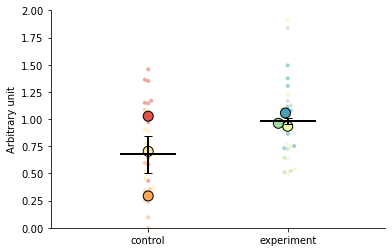

In [7]:
data_exp = generate_data(true_value=0.8, inter_cluster_SD=0.15, intra_cluster_SD=0.3, \
                             N_clusters=3, N_per_cluster=10)
data_control = generate_data(true_value=1, inter_cluster_SD=0.15, intra_cluster_SD=0.3, \
                             N_clusters=3, N_per_cluster=10)
analyze(data_exp, data_control)



And set the values of 'drug' and 'control' identical:

Mean experimetal =  1.074
Mean control =  1.088

inter cluster SD = 0.248
intra cluster SD = 0.255
ICC =  0.486


p value adjusted =  0.957
There is no reason to reject the null hypothesis of equality of means with a significance level of 0.05


Let's assume that the measured parameters are true and simulate data based on them.
So, the probability of false negative error is 0.977


Let's assume that your SD are true and 
 mean_exp = mean_control = (mean_exp+ mean_control)/2 =  1.081
So, the probability of false positive error is 0.021


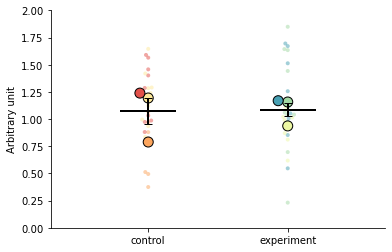

In [8]:
data_exp = generate_data(true_value=1, inter_cluster_SD=0.15, intra_cluster_SD=0.3, \
                             N_clusters=3, N_per_cluster=10)
data_control = generate_data(true_value=1, inter_cluster_SD=0.15, intra_cluster_SD=0.3, \
                             N_clusters=3, N_per_cluster=10)
analyze(data_exp, data_control)

Mean experimetal =  1.009
Mean control =  1.021

inter cluster SD = 0.107
intra cluster SD = 0.279
ICC =  0.127


p value adjusted =  0.882
There is no reason to reject the null hypothesis of equality of means with a significance level of 0.05


Let's assume that the measured parameters are true and simulate data based on them.
So, the probability of false negative error is 0.947


Let's assume that your SD are true and 
 mean_exp = mean_control = (mean_exp+ mean_control)/2 =  1.015
So, the probability of false positive error is 0.05


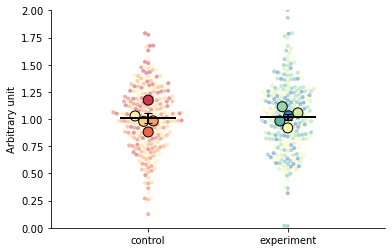

In [9]:
data_exp = generate_data(true_value=1, inter_cluster_SD=0.15, intra_cluster_SD=0.3, \
                             N_clusters=5, N_per_cluster=50)
data_control = generate_data(true_value=1, inter_cluster_SD=0.15, intra_cluster_SD=0.3, \
                             N_clusters=5, N_per_cluster=50)
analyze(data_exp, data_control)

## 2. Show a dependence of error probability on ICC



For now we have seen different experiments. But how does the variation of values affect the error probability? There are also several types of data processing (read methods). Which one is better?

Here we investigate the false positive result and vary inter_cluster_SD and hence ICC (see methods).

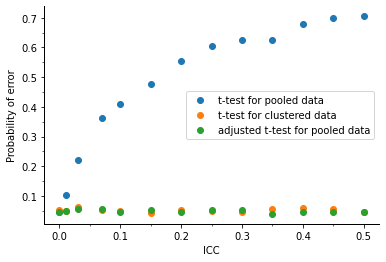

In [89]:
ICC = np.array([0.0, 0.01, 0.03, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, \
0.4, 0.45, 0.5])

probability = np.zeros((3, len(ICC)))
probability[0,:] = error_probability_ICC(NN=1000, true_exp_value=1, \
                                    true_control_value=1, \
                                    intra_cluster_SD=0.3, N_clusters=30, \
                                    N_per_cluster=50, ICC=ICC, data_method='pool', \
                                    ttest_method='simple')
probability[1,:] = error_probability_ICC(NN=1000, true_exp_value=1, \
                                        true_control_value=1,  \
                                        intra_cluster_SD=0.3, N_clusters=30, \
                                        N_per_cluster=50, ICC=ICC, data_method='cluster', \
                                        ttest_method='simple')
probability[2,:] = error_probability_ICC(NN=1000, true_exp_value=1, \
                                        true_control_value=1, \
                                        intra_cluster_SD=0.3, N_clusters=30, \
                                        N_per_cluster=50, ICC=ICC, data_method='pool', \
                                        ttest_method='adjusted')
label = ['t-test for pooled data', 't-test for clustered data', 'adjusted t-test for pooled data']
display_graph(probability, ICC, label)

This figure shows us that the use t-test for all your pooled data can lead to false negative result. However one can save the situation by applying t-test for daily means of measurements or using adjusted t-test for pooled data.

## Show heatmap of error plobability in dependence of the number of clusters and measurements per cluster



Let's now think about the number of days and measurements per day. Which parameter should an experimentator increase in order to achieve a reliable result? Should one even bother increasing the number of complex experiments? To answer these questions we will vary the number of days and measurements per day and calculate the probability of error. For this NN=1000 experiments (the ones in the first figure) are carried out.

### **False positive error**

***Processing method: t-test for pooled data:***

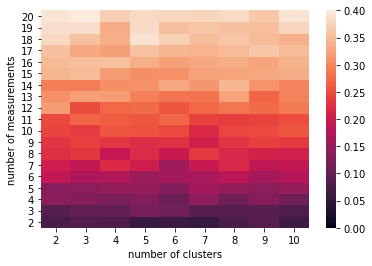

In [41]:
probability = error_probability_heatmap(MAX_N_clusters=10, MAX_N_per_cluster=20, \
                                        NN=1000, true_exp_value=1, true_control_value=1,\
                                        inter_cluster_SD=0.15, intra_cluster_SD=0.3, data_method='pool', \
                                        ttest_method='simple')
display_heatmap(probability, MAX_N_clusters=10, MAX_N_per_cluster=20, scaleMax=0.4)

***Processing method: t-test for cluster means:***

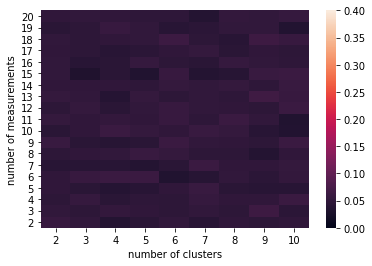

In [27]:
probability = error_probability_heatmap(MAX_N_clusters=10, MAX_N_per_cluster=20, \
                                        NN=1000, true_exp_value=1, true_control_value=1,\
                                        inter_cluster_SD=0.15, intra_cluster_SD=0.3, data_method='cluster', \
                                        ttest_method='simple')
display_heatmap(probability, MAX_N_clusters=10, MAX_N_per_cluster=20, scaleMax=0.4)

***Processing method: adjusted t-test for pooled data:***

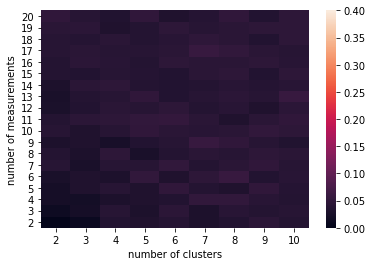

In [28]:
probability = error_probability_heatmap(MAX_N_clusters=10, MAX_N_per_cluster=20, \
                                        NN=1000, true_exp_value=1, true_control_value=1,\
                                        inter_cluster_SD=0.15, intra_cluster_SD=0.3, data_method='pool', \
                                        ttest_method='adjusted')
display_heatmap(probability, MAX_N_clusters=10, MAX_N_per_cluster=20, scaleMax=0.4)

### **False negative error**

***Processing method: t-test for pooled data:***

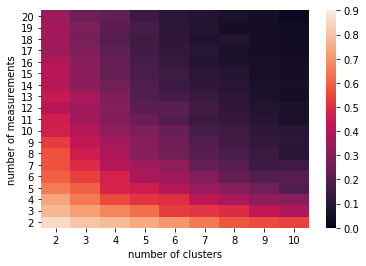

In [29]:
probability = error_probability_heatmap(MAX_N_clusters=10, MAX_N_per_cluster=20, \
                                        NN=1000, true_exp_value=0.8, true_control_value=1,\
                                        inter_cluster_SD=0.15, intra_cluster_SD=0.3, data_method='pool', \
                                        ttest_method='simple')
display_heatmap(probability, MAX_N_clusters=10, MAX_N_per_cluster=20, scaleMax=0.9)

***Processing method: t-test for cluster means:***

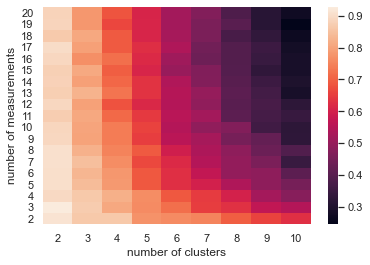

In [157]:
probability = error_probability_heatmap(MAX_N_clusters=10, MAX_N_per_cluster=20, \
                                        NN=1000, true_exp_value=0.8, true_control_value=1,\
                                        inter_cluster_SD=0.15, intra_cluster_SD=0.3, data_method='cluster', \
                                        ttest_method='simple')
display_heatmap(probability, MAX_N_clusters=10, MAX_N_per_cluster=20)

***Processing method: adjusted t-test for pooled data:***

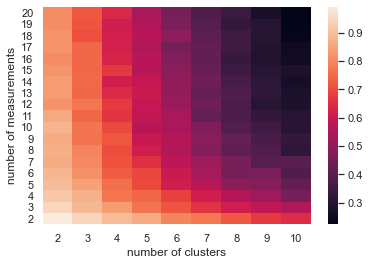

In [158]:
probability = error_probability_heatmap(MAX_N_clusters=10, MAX_N_per_cluster=20, \
                                        NN=1000, true_exp_value=0.8, true_control_value=1,\
                                        inter_cluster_SD=0.15, intra_cluster_SD=0.3, data_method='pool', \
                                        ttest_method='adjusted')
display_heatmap(probability, MAX_N_clusters=10, MAX_N_per_cluster=20, scaleMax)

These heatmaps show that not in every situation the increase of experiments can help